In [ ]:
import datetime
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
startDate = '2013-01-01'
endDate = '2013-01-01'

In [ ]:
datetime.timedelta(days=15)

datetime.timedelta(15)

In [ ]:
datetime.datetime.strptime(startDate, "%Y-%m-%d")

datetime.datetime(2013, 1, 1, 0, 0)

In [ ]:
date_rng = pd.date_range(start=datetime.datetime.strptime(startDate, "%Y-%m-%d"), 
                         end=datetime.datetime.strptime(endDate, "%Y-%m-%d") + datetime.timedelta(hours=23), 
                         freq='H')

In [ ]:
len(date_rng)

24

In [ ]:
temperature = [34.38,
34.36,
34.74,
35.26,
35.23,
35.29,
35.64,
36.02,
36.1,
36.98,
37.01,
36.75,
36.01,
35.66,
34.72,
33.9,
32.62,
31.51,
30.73,
29.5,
26.94,
25.47,
23.84,
22.55]

In [ ]:
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = temperature
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

,data
datetime,
2013-01-01 00:00:00,34.38
2013-01-01 01:00:00,34.36
2013-01-01 02:00:00,34.74
2013-01-01 03:00:00,35.26
2013-01-01 04:00:00,35.23


In [ ]:
df

,data
datetime,
2013-01-01 00:00:00,34.38
2013-01-01 01:00:00,34.36
2013-01-01 02:00:00,34.74
2013-01-01 03:00:00,35.26
2013-01-01 04:00:00,35.23
2013-01-01 05:00:00,35.29
2013-01-01 06:00:00,35.64
2013-01-01 07:00:00,36.02
2013-01-01 08:00:00,36.10


In [ ]:
df

,data
datetime,
2013-01-01 00:00:00,34.38
2013-01-01 01:00:00,34.36
2013-01-01 02:00:00,34.74
2013-01-01 03:00:00,35.26
2013-01-01 04:00:00,35.23
2013-01-01 05:00:00,35.29
2013-01-01 06:00:00,35.64
2013-01-01 07:00:00,36.02
2013-01-01 08:00:00,36.10


In [ ]:
# fit model
model = ARIMA(df, order=(3, 0, 0))
model_fit = model.fit(disp=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
print(model.order)
print(model.seasonal_order)

AttributeError: ignored

                              ARMA Model Results                              
Dep. Variable:                   data   No. Observations:                   24
Model:                     ARMA(3, 0)   Log Likelihood                 -19.607
Method:                       css-mle   S.D. of innovations              0.477
Date:                Sun, 06 Dec 2020   AIC                             49.214
Time:                        02:08:45   BIC                             55.104
Sample:                    01-01-2013   HQIC                            50.777
                         - 01-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8833      3.892      7.679      0.000      22.256      37.511
ar.L1.data     1.5304      0.189      8.116      0.000       1.161       1.900
ar.L2.data    -0.2113      0.375     -0.564      0.5

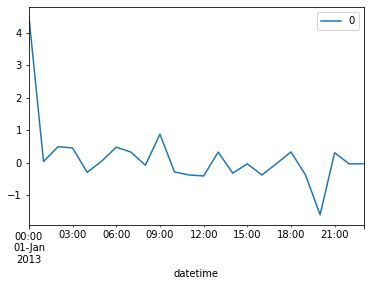

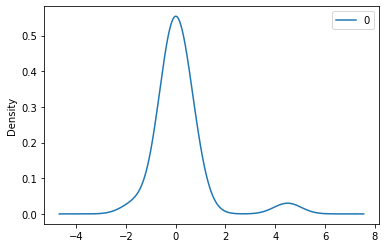

               0
count  24.000000
mean    0.157331
std     1.042421
min    -1.613917
25%    -0.310122
50%    -0.036833
75%     0.323789
max     4.496673


In [ ]:
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
n = 1

In [ ]:
pred = model_fit.predict(start=datetime.datetime.strptime(endDate, "%Y-%m-%d") + datetime.timedelta(days=1), 
                         end=datetime.datetime.strptime(endDate, "%Y-%m-%d") + datetime.timedelta(days=n, hours=23), dynamic=False)

In [ ]:
len(pred)

24

In [ ]:
pred

2013-01-02 00:00:00    21.467193
2013-01-02 01:00:00    20.647661
2013-01-02 02:00:00    20.069410
2013-01-02 03:00:00    19.732962
2013-01-02 04:00:00    19.624326
2013-01-02 05:00:00    19.729606
2013-01-02 06:00:00    20.030304
2013-01-02 07:00:00    20.505904
2013-01-02 08:00:00    21.133730
2013-01-02 09:00:00    21.889827
2013-01-02 10:00:00    22.749435
2013-01-02 11:00:00    23.687588
2013-01-02 12:00:00    24.679609
2013-01-02 13:00:00    25.701593
2013-01-02 14:00:00    26.730823
2013-01-02 15:00:00    27.746139
2013-01-02 16:00:00    28.728244
2013-01-02 17:00:00    29.659950
2013-01-02 18:00:00    30.526367
2013-01-02 19:00:00    31.315027
2013-01-02 20:00:00    32.015955
2013-01-02 21:00:00    32.621676
2013-01-02 22:00:00    33.127188
2013-01-02 23:00:00    33.529865
Freq: H, dtype: float64

In [ ]:
ARIMA?